# 50_startups 

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#loading csv file
df=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df=df.rename(columns= {"R&D Spend" : "RDS", "Administration" : "admin", 
                        "Marketing Spend" : "mks", "State": "state", "Profit" : "profit"})
df.head() 

,RDS,admin,mks,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


One Hot Encoding

In [4]:
df1=pd.get_dummies(df)
df1=df1.rename(columns={"state_New York": "state_NewYork"})
df1.head()

,RDS,admin,mks,profit,state_California,state_Florida,state_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [5]:
#check for missing values
df.isna().sum()

RDS       0
admin     0
mks       0
state     0
profit    0
dtype: int64

In [6]:
#check for duplicates values
df.duplicated().sum()

0

Descriptive statstics

In [7]:
 df.describe()

,RDS,admin,mks,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0.5, 1.0, 'Profit')

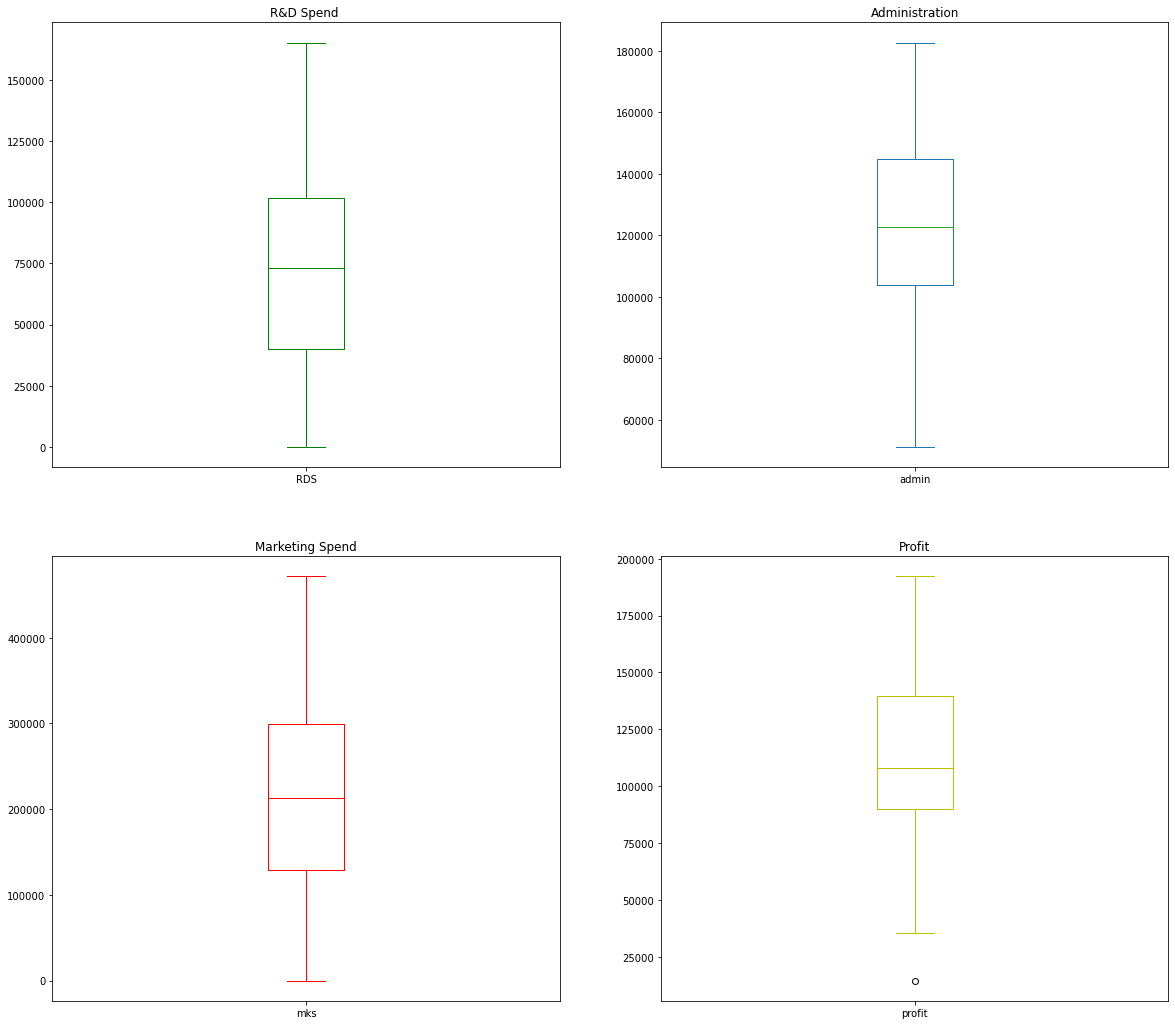

In [8]:
#visualization
plt.figure(figsize=(20,18))
#RDS
plt.subplot(2,2,1)
df1['RDS'].plot(kind='box',color='g',)
plt.title('R&D Spend ')
#admin
plt.subplot(2,2,2)
df1['admin'].plot(kind='box')
plt.title('Administration')
#mks
plt.subplot(2,2,3)
df1['mks'].plot(kind='box',color='r')
plt.title('Marketing Spend')
#profit
plt.subplot(2,2,4)
df1['profit'].plot(kind='box',color='y')
plt.title('Profit')

*From the above boxplot it is clear that most of the money has spent on Marketing than any other departments. Marketing box plot looks more consistent(equal partition of box or quartiles are same distance away from each other.) than other box plots and due to its consistency it will have its impact on target variable more than any other input variable.

<AxesSubplot:xlabel='state', ylabel='profit'>

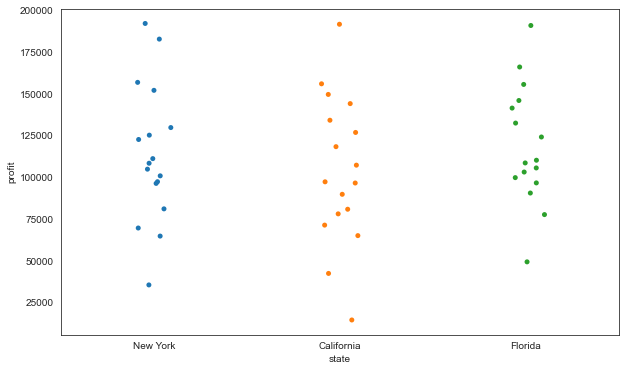

In [9]:
# vasualizing states
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.stripplot(x='state',y='profit',data=df)

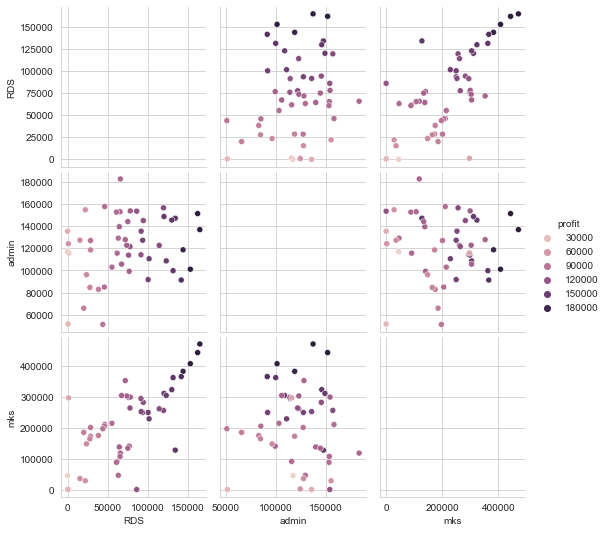

In [10]:
#pair plot to visualize relation 
sns.set_style(style='whitegrid')
sns.pairplot(df,hue='profit')

*Above pair plot reveals RDS and MKS has linear trend with profit.

In [11]:
#removing outliers from the profit
Q1,Q3 = np.percentile(df.profit , [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers = df.profit[(df.profit > ul) | (df.profit < ll)]
outliers

49    14681.4
Name: profit, dtype: float64

In [12]:
df=df.drop(index=49)
df.tail()

,RDS,admin,mks,state,profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [13]:
df1=df1.drop(index=49)
df1.tail()

,RDS,admin,mks,profit,state_California,state_Florida,state_NewYork
44,22177.74,154806.14,28334.72,65200.33,1,0,0
45,1000.23,124153.04,1903.93,64926.08,0,0,1
46,1315.46,115816.21,297114.46,49490.75,0,1,0
47,0.00,135426.92,0.00,42559.73,1,0,0
48,542.05,51743.15,0.00,35673.41,0,0,1


Correlaion matrix

In [14]:
df.corr()

,RDS,admin,mks,profit
RDS,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
mks,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


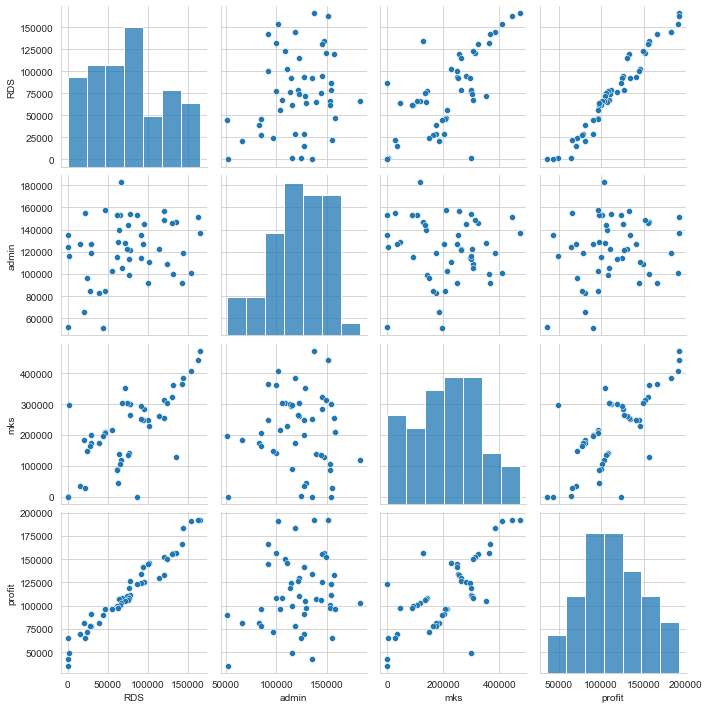

In [15]:
#graphical representation of raltion of variables
sns.pairplot(df)

*From the above pair plot we can see that RDS and profit has strong linear relationship followed by MKS has moderate relationship with profit.

Collinearity

In [16]:
#checking collinearity of independent variable
rsq_rds=smf.ols('RDS~admin+mks',data=df).fit().rsquared
vif_rsd=1/(1-rsq_rds)

rsq_adm=smf.ols('admin~RDS+mks',data=df).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mks=smf.ols('mks~admin+RDS',data=df).fit().rsquared
vif_mks=1/(1-rsq_mks)
                
#DataFrame of VIF
d1=pd.DataFrame({'Variable':['RDS','admin','mks'],'VIF':[rsq_rds,rsq_adm,rsq_mks]})
d1    

,Variable,VIF
0,RDS,0.579435
1,admin,0.149061
2,mks,0.553563


VIF of independent variable is less than 20 implies no collinearity and input variables are independent of each other 

# Model Building

Multilinear Regression models

In [17]:
model=smf.ols('profit~ RDS + admin + mks',data=df1).fit()
model

#pvlaue
print(model.pvalues)

#r^2value
print(model.rsquared,model.rsquared_adj)

Intercept    2.960000e-12
RDS          1.971077e-24
admin        6.070728e-01
mks          7.458443e-02
dtype: float64
0.9613162435129847 0.9587373264138503


In [18]:
model1=smf.ols('profit ~ RDS + admin + mks  + state_California + state_Florida + state_NewYork',data=df1).fit()
model1

#pvalue
print(model1.pvalues)

#r^2 value
print(model1.rsquared,model1.rsquared_adj)

Intercept           9.775355e-12
RDS                 1.898629e-23
admin               6.162761e-01
mks                 7.828496e-02
state_California    2.245343e-08
state_Florida       1.586488e-06
state_NewYork       4.952785e-07
dtype: float64
0.9618082858227786 0.9573673888254273


In [19]:
model2=smf.ols('profit~ RDS + mks',data=df1).fit()
model2

#pvalue
print(model2.pvalues)

#r^2 value
print(model2.rsquared,model2.rsquared_adj)

Intercept    1.970460e-25
RDS          3.628510e-26
mks          4.084443e-02
dtype: float64
0.9610856807456628 0.9593937538215612


In [20]:
model3=smf.ols('profit ~ RDS +  mks  + state_California + state_Florida + state_NewYork',data=df1).fit()
model3

#pvalue
print(model3.pvalues)

#r^2 value
print(model3.rsquared,model3.rsquared_adj)

Intercept           3.126811e-24
RDS                 3.778016e-25
mks                 4.319247e-02
state_California    1.773995e-10
state_Florida       4.306188e-08
state_NewYork       1.071371e-08
dtype: float64
0.9615819564241954 0.9580894070082132


Simple linear regression model

In [21]:
#admin
ml_A=smf.ols('profit~admin',data=df1).fit()

#pvalues
print(ml_A.pvalues)

#r^2 values
print(ml_A.rsquared,ml_A.rsquared_adj)

Intercept    0.001618
admin        0.155918
dtype: float64
0.04237035844418091 0.02199525968767424


In [22]:
#RDS
ml_R=smf.ols('profit~RDS',data=df1).fit()

#pvalues
print(ml_R.pvalues)

#r^2 values
print(ml_R.rsquared,ml_R.rsquared_adj)

Intercept    2.221695e-27
RDS          7.555104e-34
dtype: float64
0.9573395972488337 0.9564319291051918


In [23]:
#mks
ml_M=smf.ols('profit~mks',data=df1).fit()

#pvalues
print(ml_M.pvalues)

#r^2 values
print(ml_M.rsquared,ml_M.rsquared_adj)

Intercept    5.905020e-11
mks          1.304853e-09
dtype: float64
0.5465748398585546 0.536927496025758


In [24]:
#DataFrame of r^2 values
d1=pd.DataFrame({'MODELS':['profit~ RDS + admin + mks','profit ~ RDS + admin + mks  + states','profit~ RDS + mks','profit ~ RDS +  mks  + states','profit~admin','profit~RDS','profit~mks'],
                  'R^2 value':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,ml_A.rsquared,ml_R.rsquared,ml_M.rsquared],
                   'R^2_adj_values':[model.rsquared_adj,model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,ml_A.rsquared_adj,ml_R.rsquared_adj,ml_M.rsquared_adj]})
d1

,MODELS,R^2 value,R^2_adj_values
0,profit~ RDS + admin + mks,0.961316,0.958737
1,profit ~ RDS + admin + mks + states,0.961808,0.957367
2,profit~ RDS + mks,0.961086,0.959394
3,profit ~ RDS + mks + states,0.961582,0.958089
4,profit~admin,0.042370,0.021995
5,profit~RDS,0.957340,0.956432
6,profit~mks,0.546575,0.536927


In [25]:
d1['R^2_adj_values'].idxmax()

2

Maximun R^2_adj_values obtain from model-(profit~ RDS + mks).

In [26]:
final_model=smf.ols('profit~RDS + mks',data=df1).fit()
final_model

In [27]:
#coefficients
final_model.params

Intercept    49785.269847
RDS              0.775384
mks              0.027446
dtype: float64

In [28]:
#pvalues and tvalues
print(final_model.tvalues,'\n',final_model.pvalues)

Intercept    21.261366
RDS          22.135643
mks           2.104326
dtype: float64 
 Intercept    1.970460e-25
RDS          3.628510e-26
mks          4.084443e-02
dtype: float64


In [29]:
#r^2 values
(final_model.rsquared,final_model.rsquared_adj)

(0.9610856807456628, 0.9593937538215612)

MODEL VALIDATION

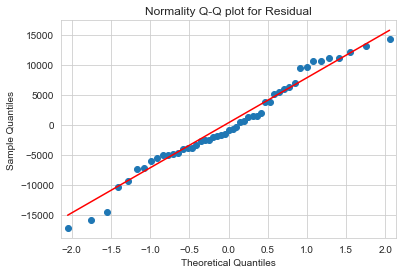

In [30]:
#check for normality
qqplot=sm.qqplot(final_model.resid,line='q')
plt.title('Normality Q-Q plot for Residual')
plt.show()

Inference-Most of the data points are on the line implies normal distribution.

In [31]:
#Homoscedasticity of residual
def get_standardized_vals(vals):
    return (vals-vals.mean())/(vals.std())

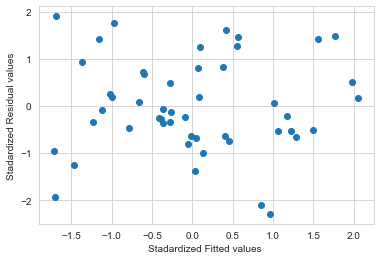

In [32]:
plt.scatter(get_standardized_vals(final_model.fittedvalues),get_standardized_vals(final_model.resid))
plt.xlabel('Stadardized Fitted values ')
plt.ylabel('Stadardized Residual values')
plt.show()

Inference- observing above fig we say that variance of residual is constant since they don't have any trend.

eval_env: 1


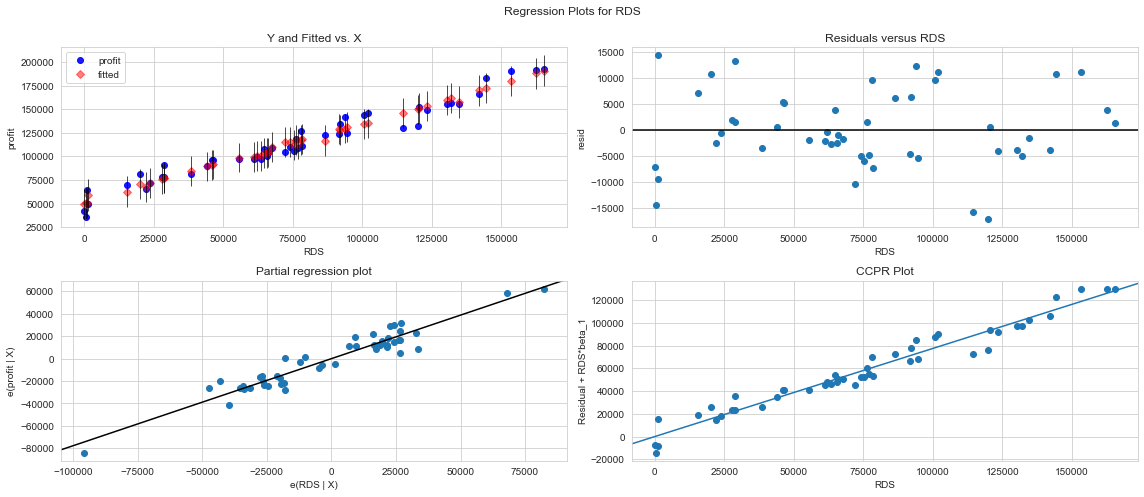

In [33]:
#residual vs regressor (regressor plot) to check residual(mean)=0
#for RDS
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'RDS',fig=fig)
plt.show()

eval_env: 1


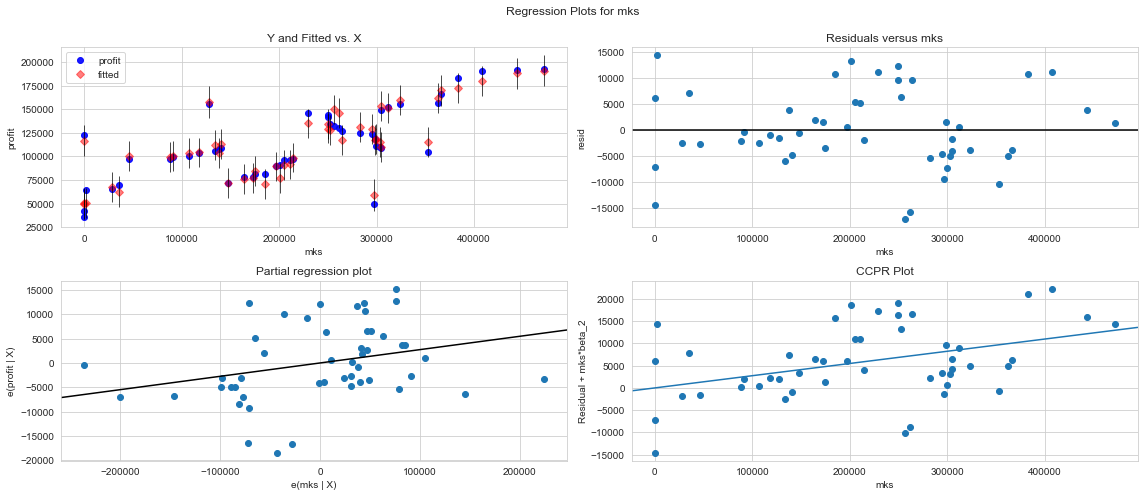

In [34]:
#for mks
fig=plt.figure(figsize=(16,7))
fig=sm.graphics.plot_regress_exog(final_model,'mks',fig=fig)
plt.show()

Inference-Observing above graphs we can see than there is no tred in any residual vs regressor plot and the distribution of the points in such way that some points are above the line and some are below the line from this we conclude that mean of error is zero.

MODEL DELETION DIAGNOSTIC

Cooks distance

In [35]:
#checking influence points
model_influence=final_model.get_influence()
(c,_)=model_influence.cooks_distance

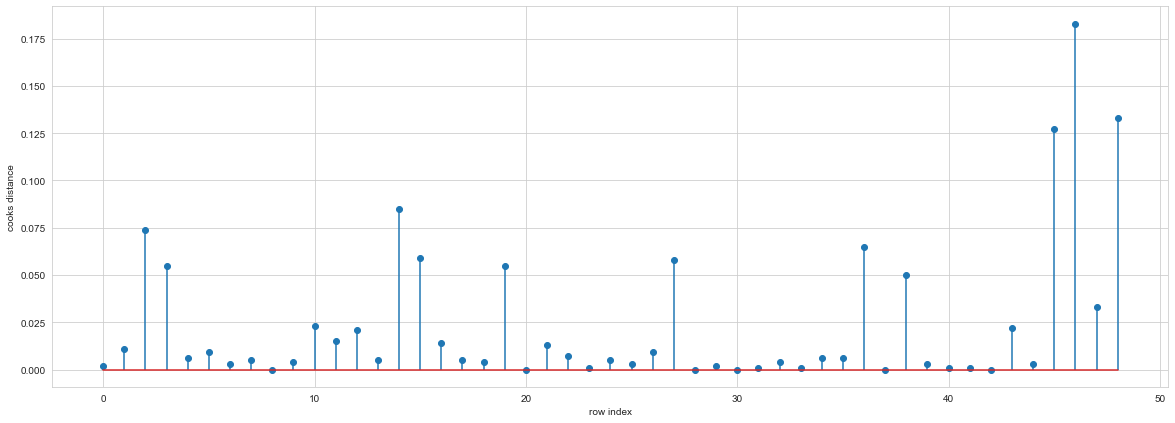

In [36]:
#visualizing influencer points using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [37]:
(np.argmax(c),np.max(c))

(46, 0.1833755649133841)

High influence points

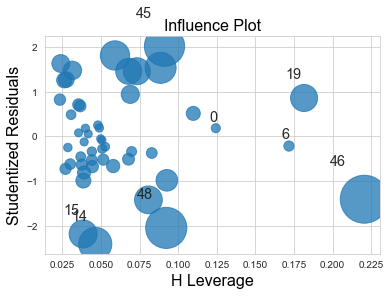

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

In [39]:
#leverage cuttoff value = 3*(k+1)/n ; k = no.of columns & n = no. of datapoints
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36734693877551017

From the above 2 plots we can conclude that all the points are below the leverage cuttoff value. Hence no influencer point present in our model.

PREDICTION 

In [40]:
final_model.predict(df.iloc[:5])

0    190942.726927
1    188043.924520
2    179957.312472
3    172246.416164
4    170022.687457
dtype: float64

In [41]:
final_model.predict(df)

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [42]:
new_data=pd.DataFrame({'RDS':130000,'admin':54000,'mks':56400,'state':'New York'},index=[1])
new_data

,RDS,admin,mks,state
1,130000,54000,56400,New York


In [43]:
final_model.predict(new_data)

1    152133.098946
dtype: float64

In [44]:
#summary 
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           3.74e-33
Time:                        12:34:03   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.0